# WeatherPy
----

### Conclusions:
* There is no significant correlation between the latitude and wind speed plot.
* Latitude and cloudiness also didn't have a strong relationship, but there was a strong consistency of data for the 0% and around 90% marks.
* This data clearly shows temperatures are higher as they approach the equator, which we all know to be true.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

## Perform API Calls

In [7]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | haines junction
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | los llanos de aridane
Processing Record 8 of Set 1 | pangody
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | takoradi
Processing Record 11 of Set 1 | turukhansk
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | naze
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | sao sebastiao
Processing Record 16 of Set 1 | katobu
Processing Record 17 of Set 1 | rawson
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | linchuan
City not found. Skipping...
Processing Record 21 of Set 1 | lorengau
Processing Record 

Processing Record 31 of Set 4 | carnarvon
Processing Record 32 of Set 4 | lufilufi
Processing Record 33 of Set 4 | saleaula
City not found. Skipping...
Processing Record 34 of Set 4 | salisbury
Processing Record 35 of Set 4 | victoria
Processing Record 36 of Set 4 | constitucion
Processing Record 37 of Set 4 | mathathane
Processing Record 38 of Set 4 | aklavik
Processing Record 39 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 40 of Set 4 | savannakhet
Processing Record 41 of Set 4 | agde
Processing Record 42 of Set 4 | kamphaeng phet
Processing Record 43 of Set 4 | ludvika
Processing Record 44 of Set 4 | kangaatsiaq
Processing Record 45 of Set 4 | salinopolis
Processing Record 46 of Set 4 | mount pleasant
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | aqtobe
Processing Record 49 of Set 4 | jalu
Processing Record 0 of Set 5 | dikson
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of 

Processing Record 20 of Set 8 | evansville
Processing Record 21 of Set 8 | shelburne
Processing Record 22 of Set 8 | alofi
Processing Record 23 of Set 8 | ciudad bolivar
Processing Record 24 of Set 8 | male
Processing Record 25 of Set 8 | mumford
Processing Record 26 of Set 8 | road town
Processing Record 27 of Set 8 | maceio
Processing Record 28 of Set 8 | camacupa
Processing Record 29 of Set 8 | broome
Processing Record 30 of Set 8 | islamkot
Processing Record 31 of Set 8 | platnirovskaya
Processing Record 32 of Set 8 | bathsheba
Processing Record 33 of Set 8 | salalah
Processing Record 34 of Set 8 | saint-gaudens
Processing Record 35 of Set 8 | medicine hat
Processing Record 36 of Set 8 | bardiyah
City not found. Skipping...
Processing Record 37 of Set 8 | yaan
Processing Record 38 of Set 8 | sibolga
Processing Record 39 of Set 8 | sao filipe
Processing Record 40 of Set 8 | mangit
Processing Record 41 of Set 8 | maduao
Processing Record 42 of Set 8 | mandalgovi
Processing Record 43 

Processing Record 8 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 9 of Set 12 | belomorsk
Processing Record 10 of Set 12 | kentau
Processing Record 11 of Set 12 | seymchan
Processing Record 12 of Set 12 | macherla
Processing Record 13 of Set 12 | tirumullaivasal
Processing Record 14 of Set 12 | hualmay
Processing Record 15 of Set 12 | daru
Processing Record 16 of Set 12 | sahrak
City not found. Skipping...
Processing Record 17 of Set 12 | tamasopo
Processing Record 18 of Set 12 | contai
Processing Record 19 of Set 12 | wismar
Processing Record 20 of Set 12 | te anau
Processing Record 21 of Set 12 | kruisfontein
Processing Record 22 of Set 12 | voyvozh
Processing Record 23 of Set 12 | nalbach
Processing Record 24 of Set 12 | linqiong
Processing Record 25 of Set 12 | shanghai
Processing Record 26 of Set 12 | chipinge
Processing Record 27 of Set 12 | bani
Processing Record 28 of Set 12 | ballina
Processing Record 29 of Set 12 | aksu
Processing Record 30 of Set 12 | y

In [8]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [9]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,68,PF,1547595286,99,-23.12,-134.97,80.05,13.67
1,jamestown,12,AU,1547595145,43,-33.21,138.60,90.17,7.74
2,busselton,12,AU,1547595286,100,-33.64,115.35,63.49,10.65
3,mahebourg,40,MU,1547593200,78,-20.41,57.70,78.80,3.36
4,haines junction,92,CA,1547595058,79,60.75,-137.51,1.61,2.37


## Latitude vs Temperature Plot

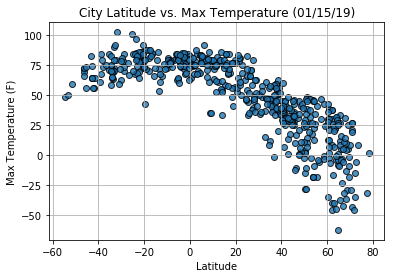

In [10]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

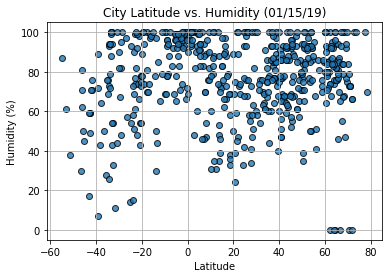

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

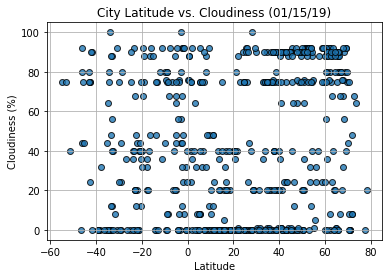

In [12]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

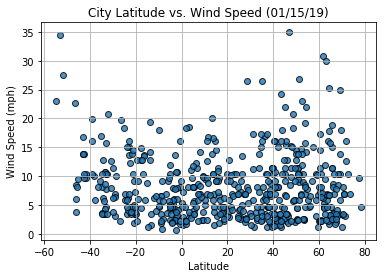

In [13]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()